# 3D test case: Baroclinic Instability

In [216]:
import h5py
import numpy as np
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('classic')
%matplotlib inline

import converter
from importlib import reload
reload(converter)

import utils
reload(utils)

<module 'utils' from '/home/ray/git-projects/RKLM_Reference/visualiser_debugger/utils.py'>

In [217]:
#####################################################
#
# Time labels for C and Python
#
def get_time(t_label):
    label = t_label + '_' + 'ic'
#     label = t_label + '_' + 'before_advect'
#     label = t_label + '_' + 'after_advect'
#     label = t_label + '_' + 'after_ebnaexp'
#     label = t_label + '_' + 'after_ebnaimp'
#     label = t_label + '_' + 'after_half_step'
#     label = t_label + '_' + 'after_efna'
#     label = t_label + '_' + 'after_full_advect'
#     label = t_label + '_' + 'after_full_ebnaexp'
#     label = t_label + '_' + 'after_full_step'
    return label
#
#####################################################

#####################################################
#
# C-output folder names
#
base_suffix = '_baroclinic_instability_periodic/'
# 
#####################################################
#
# and its filename
#
# py_filename = "output_acoustic_wave_high_low_mach_gravity_comp.h5"
# py_filename = "output_internal_long_wave_low_mach_gravity_comp.h5"
# py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp.h5"

#####################################################

figsize_tuple = (12,3)

In [218]:
base_folder_name = "../RKLM_Reference/output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

# Manually list the folder names for each directory
directories = ['rho']
directories += ['S']
directories += ['T']
directories += ['Y']
directories += ['buoy']
directories += ['dT'] 
directories += ['dY']
directories += ['dp2_c']
directories += ['dp2_nodes']
directories += ['dpdim']
directories += ['drhoY'] 
directories += ['p']
directories += ['p2_c']
directories += ['p2_nodes']
directories += ['u']
directories += ['v']
directories += ['w']
directories += ['vortz']
directories += ['rhoY']
directories += ['rhoe']
directories += ['rhou']
directories += ['rhov']
directories += ['rhow']
directories += ['rhs']
directories += ['buoy']

# And manually list the file names.
filenames = ['rho']
filenames += ['S'] 
filenames += ['T']
filenames += ['Y']
filenames += ['buoy']
filenames += ['dT']
filenames += ['dY']
filenames += ['dp2_c']
filenames += ['dp2_n']
filenames += ['dpdim']
filenames += ['drhoY'] 
filenames += ['p']
filenames += ['p2_c']
filenames += ['p2_n']
filenames += ['u']
filenames += ['v']
filenames += ['w']
filenames += ['vortz']
filenames += ['rhoY']
filenames += ['rhoe']
filenames += ['rhou']
filenames += ['rhov']
filenames += ['rhow']
filenames += ['rhs']
filenames += ['buoy']

In [219]:
# manually specific folder names
test_cases_folders = ['p2_nodes']
test_cases_folders += ['rho']
test_cases_folders += ['rhoY']
test_cases_folders += ['rhoe']
test_cases_folders += ['rhou']
test_cases_folders += ['rhov']
test_cases_folders += ['rhow']
test_cases_folders += ['u']
test_cases_folders += ['v']
test_cases_folders += ['vortz']
test_cases_folders += ['dT'] 
test_cases_folders += ['Y']
test_cases_folders += ['dY']
test_cases_folders += ['buoy']

# and filenames
test_cases_names = ['p2_n']
test_cases_names += ['rho']
test_cases_names += ['rhoY']
test_cases_names += ['rhoe']
test_cases_names += ['rhou']
test_cases_names += ['rhov']
test_cases_names += ['rhow']
test_cases_names += ['u']
test_cases_names += ['v']
test_cases_names += ['vortz']
test_cases_names += ['dT']
test_cases_names += ['Y']
test_cases_names += ['dY']
test_cases_names += ['buoy']

[[0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 ...
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]]
[[0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 ...
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]
 [0.9248249 0.9248249 0.9248249 ... 0.9248249 0.9248249 0.9248249]]


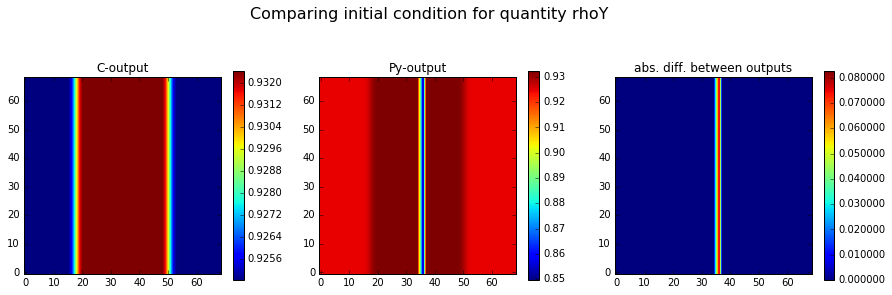

In [351]:
t_label = '000'
time = get_time(t_label)

converter_obj = converter.convert(base_path,folder_comp,time,t_label)
converter_obj.convert_files(directories,filenames)
c = converter_obj.get_converted_files(test_cases_folders, test_cases_names)

# print(c.Y[10])
# plt.figure()
# print(c_arr.shape)
# plt.imshow(c_arr[:,19,:].T, origin='lower')
# plt.colorbar(fraction=0.04, pad=0.04)
# plt.show()

py_basename = "output_baroclinic_instability_periodic"
py_directory = "../%s/" %py_basename

ens_size = 1
grid_x = 65
grid_y = 33
grid_z = 65
end_time = 25.0
suffix = ""

filename = utils.get_filename(py_basename,grid_x,grid_y,ens_size,end_time,suffix,grid_z)
path = utils.get_path(py_directory, filename)

attribute = 'p2_nodes'
attribute = 'rho'
attribute = 'rhoY'
py_arr = utils.ensemble_test_case(0, path, ens_size, attribute, 'ic')

c_arr = c.p2_nodes
c_arr = c.rho
c_arr = c.rhoY
slice_idx = 3

print(c_arr[:,slice_idx,:])
print(py_arr[:,slice_idx,:])

fig, ax = plt.subplots(ncols=3, figsize=(15,5))
im0 = ax[0].imshow(c_arr[:,slice_idx,:], origin='lower')
ax[0].set_title("C-output")
im1 = ax[1].imshow(py_arr[:,slice_idx,:], origin='lower')
fig.colorbar(im0,ax=ax[0],shrink=.75)
ax[1].set_title("Py-output")
fig.colorbar(im1,ax=ax[1],shrink=.75)
im2 = ax[2].imshow(np.abs(c_arr[:,slice_idx,:] - py_arr[:,slice_idx,:]), origin='lower')
ax[2].set_title("abs. diff. between outputs")
fig.colorbar(im2,ax=ax[2],shrink=.75, format='%.6f')
fig.suptitle(r'Comparing initial condition for quantity %s' %attribute, fontsize='16')
plt.show()

In [319]:
print("%.3d" %0)
print(type(0.0) is float)
print(type(0.0))

000
True
<class 'float'>
